In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [97]:
file_path = os.path.abspath('country_geospatial.csv')
country_geo = pd.read_csv(file_path, encoding='latin1')
country_geo.head()

,FIPS,ISO2,ISO3,NAME,AREA,POP2005,LON,LAT
0,AC,AG,ATG,Antigua and Barbuda,44,83039,-61.783,17.078
1,AG,DZ,DZA,Algeria,238174,32854159,2.632,28.163
2,AJ,AZ,AZE,Azerbaijan,8260,8352021,47.395,40.430
3,AL,AL,ALB,Albania,2740,3153731,20.068,41.143
4,AM,AM,ARM,Armenia,2820,3017661,44.563,40.534


In [98]:
file_path2 = os.path.abspath('country_dailyavg_ERA5_tavg_2015.csv')
era5 = pd.read_csv(file_path2)
era5.head()

,iso3,name,m01_d01,m01_d02,m01_d03,m01_d04,m01_d05,m01_d06,m01_d07,m01_d08,...,m12_d22,m12_d23,m12_d24,m12_d25,m12_d26,m12_d27,m12_d28,m12_d29,m12_d30,m12_d31
0,ABW,Aruba,25.874401,25.895487,25.826038,26.005236,26.009863,25.947550,25.843071,25.974573,...,26.191147,26.177130,26.320763,26.392471,26.323624,25.994068,26.312117,26.160402,26.066107,25.905895
1,AFG,Afghanistan,2.712129,2.886829,2.946619,2.000858,0.557583,-0.059163,0.494272,0.306136,...,1.391960,0.862745,0.779773,2.243012,3.372720,2.638835,2.543624,2.458232,2.218447,2.880458
2,AGO,Angola,22.556604,22.711628,22.932959,22.834354,22.683525,22.727060,22.934071,23.004936,...,23.044107,22.978357,22.877050,22.944944,22.858686,22.768427,22.781271,22.872131,22.869108,22.538832
3,AIA,Anguilla,25.805546,25.513340,25.342604,25.566853,25.556524,25.499607,25.447775,25.014151,...,25.903439,25.848869,25.894888,25.876009,25.946108,25.459702,25.537745,25.564631,25.389004,25.273754
4,ALA,Åland Islands,2.568998,0.861771,0.239671,-0.133540,-2.967685,-2.825017,-1.298353,-0.118631,...,2.742460,2.882870,2.571828,3.458003,3.180229,2.000175,1.709467,2.455463,3.667259,3.635450


# Task 1: Data Manipulation

In [99]:
# Merge on iso3
merged_df = pd.merge(era5, country_geo, left_on='iso3', right_on='ISO3')
merged_df.head()

,iso3,name,m01_d01,m01_d02,m01_d03,m01_d04,m01_d05,m01_d06,m01_d07,m01_d08,...,m12_d30,m12_d31,FIPS,ISO2,ISO3,NAME,AREA,POP2005,LON,LAT
0,ABW,Aruba,25.874401,25.895487,25.826038,26.005236,26.009863,25.947550,25.843071,25.974573,...,26.066107,25.905895,AA,AW,ABW,Aruba,0,102897,-69.977,12.517
1,AFG,Afghanistan,2.712129,2.886829,2.946619,2.000858,0.557583,-0.059163,0.494272,0.306136,...,2.218447,2.880458,AF,AF,AFG,Afghanistan,65209,25067407,65.216,33.677
2,AGO,Angola,22.556604,22.711628,22.932959,22.834354,22.683525,22.727060,22.934071,23.004936,...,22.869108,22.538832,AO,AO,AGO,Angola,124670,16095214,17.544,-12.296
3,AIA,Anguilla,25.805546,25.513340,25.342604,25.566853,25.556524,25.499607,25.447775,25.014151,...,25.389004,25.273754,AV,AI,AIA,Anguilla,0,12256,-63.032,18.237
4,ALA,Åland Islands,2.568998,0.861771,0.239671,-0.133540,-2.967685,-2.825017,-1.298353,-0.118631,...,3.667259,3.635450,NaN,AX,ALA,Åland Islands,0,0,19.952,60.198


In [100]:
# Create function to assign regions based on latitude
# North - latitude > 23 N
# South - latitude < -23 S
# Tropics - all latitudes between

def determine_region(latitude):
    if latitude > 23:
        return 'extra-tropical Northern Hemisphere'
    elif latitude < -23:
        return 'extra-tropical Southern Hemisphere'
    else:
        return 'tropics'

In [101]:
merged_df['region'] = merged_df['LAT'].apply(determine_region) # Apply func
merged_df

,iso3,name,m01_d01,m01_d02,m01_d03,m01_d04,m01_d05,m01_d06,m01_d07,m01_d08,...,m12_d31,FIPS,ISO2,ISO3,NAME,AREA,POP2005,LON,LAT,region
0,ABW,Aruba,25.874401,25.895487,25.826038,26.005236,26.009863,25.947550,25.843071,25.974573,...,25.905895,AA,AW,ABW,Aruba,0,102897,-69.977,12.517,tropics
1,AFG,Afghanistan,2.712129,2.886829,2.946619,2.000858,0.557583,-0.059163,0.494272,0.306136,...,2.880458,AF,AF,AFG,Afghanistan,65209,25067407,65.216,33.677,extra-tropical Northern Hemisphere
2,AGO,Angola,22.556604,22.711628,22.932959,22.834354,22.683525,22.727060,22.934071,23.004936,...,22.538832,AO,AO,AGO,Angola,124670,16095214,17.544,-12.296,tropics
3,AIA,Anguilla,25.805546,25.513340,25.342604,25.566853,25.556524,25.499607,25.447775,25.014151,...,25.273754,AV,AI,AIA,Anguilla,0,12256,-63.032,18.237,tropics
4,ALA,Åland Islands,2.568998,0.861771,0.239671,-0.133540,-2.967685,-2.825017,-1.298353,-0.118631,...,3.635450,NaN,AX,ALA,Åland Islands,0,0,19.952,60.198,extra-tropical Northern Hemisphere
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,WSM,Samoa,27.157106,26.992727,27.168112,26.951733,26.825319,26.494282,26.679964,26.738127,...,27.046362,WS,WS,WSM,Samoa,283,183845,-172.414,-13.652,tropics
242,YEM,Yemen,19.456818,19.435631,19.095058,19.052034,19.062038,19.068665,19.263821,19.419146,...,19.609661,YM,YE,YEM,Yemen,52797,21095679,48.355,15.807,tropics
243,ZAF,South Africa,22.988573,22.448444,21.910479,22.445189,23.644114,23.759691,23.031521,22.108265,...,23.220736,SF,ZA,ZAF,South Africa,121447,47938663,23.121,-30.558,extra-tropical Southern Hemisphere
244,ZMB,Zambia,22.762863,23.164856,22.669594,22.582186,22.576714,22.557766,22.905573,23.108139,...,23.018536,ZA,ZM,ZMB,Zambia,74339,11478317,26.320,-14.614,tropics


In [102]:
print("Column names:", merged_df.columns.tolist())

Column names: ['iso3', 'name', 'm01_d01', 'm01_d02', 'm01_d03', 'm01_d04', 'm01_d05', 'm01_d06', 'm01_d07', 'm01_d08', 'm01_d09', 'm01_d10', 'm01_d11', 'm01_d12', 'm01_d13', 'm01_d14', 'm01_d15', 'm01_d16', 'm01_d17', 'm01_d18', 'm01_d19', 'm01_d20', 'm01_d21', 'm01_d22', 'm01_d23', 'm01_d24', 'm01_d25', 'm01_d26', 'm01_d27', 'm01_d28', 'm01_d29', 'm01_d30', 'm01_d31', 'm02_d01', 'm02_d02', 'm02_d03', 'm02_d04', 'm02_d05', 'm02_d06', 'm02_d07', 'm02_d08', 'm02_d09', 'm02_d10', 'm02_d11', 'm02_d12', 'm02_d13', 'm02_d14', 'm02_d15', 'm02_d16', 'm02_d17', 'm02_d18', 'm02_d19', 'm02_d20', 'm02_d21', 'm02_d22', 'm02_d23', 'm02_d24', 'm02_d25', 'm02_d26', 'm02_d27', 'm02_d28', 'm03_d01', 'm03_d02', 'm03_d03', 'm03_d04', 'm03_d05', 'm03_d06', 'm03_d07', 'm03_d08', 'm03_d09', 'm03_d10', 'm03_d11', 'm03_d12', 'm03_d13', 'm03_d14', 'm03_d15', 'm03_d16', 'm03_d17', 'm03_d18', 'm03_d19', 'm03_d20', 'm03_d21', 'm03_d22', 'm03_d23', 'm03_d24', 'm03_d25', 'm03_d26', 'm03_d27', 'm03_d28', 'm03_d29', '

## Calculate area-weighted temperature

In [103]:
# Convert tens of km^2 to km^2 and population data for weighting
merged_df['area_km2'] = merged_df['AREA'] * 10
merged_df.head()

,iso3,name,m01_d01,m01_d02,m01_d03,m01_d04,m01_d05,m01_d06,m01_d07,m01_d08,...,FIPS,ISO2,ISO3,NAME,AREA,POP2005,LON,LAT,region,area_km2
0,ABW,Aruba,25.874401,25.895487,25.826038,26.005236,26.009863,25.947550,25.843071,25.974573,...,AA,AW,ABW,Aruba,0,102897,-69.977,12.517,tropics,0
1,AFG,Afghanistan,2.712129,2.886829,2.946619,2.000858,0.557583,-0.059163,0.494272,0.306136,...,AF,AF,AFG,Afghanistan,65209,25067407,65.216,33.677,extra-tropical Northern Hemisphere,652090
2,AGO,Angola,22.556604,22.711628,22.932959,22.834354,22.683525,22.727060,22.934071,23.004936,...,AO,AO,AGO,Angola,124670,16095214,17.544,-12.296,tropics,1246700
3,AIA,Anguilla,25.805546,25.513340,25.342604,25.566853,25.556524,25.499607,25.447775,25.014151,...,AV,AI,AIA,Anguilla,0,12256,-63.032,18.237,tropics,0
4,ALA,Åland Islands,2.568998,0.861771,0.239671,-0.133540,-2.967685,-2.825017,-1.298353,-0.118631,...,NaN,AX,ALA,Åland Islands,0,0,19.952,60.198,extra-tropical Northern Hemisphere,0


In [161]:
import numpy as np
import pandas as pd

regions = ['extra-tropical Northern Hemisphere', 'extra-tropical Southern Hemisphere', 'tropics']
daily_results = []

# Loop over each day
for day in range(1, 366):  # Iterate over each day in the year
    day_column = f'm{str((day-1)//31+1).zfill(2)}_d{str((day-1)%31+1).zfill(2)}'
    
    if day_column in merged_df.columns:
        for region in regions:
            # Filter data for the specific region
            region_data = merged_df[merged_df['region'] == region]

            # Calculate area-weighted temperature
            area_weighted_temp = np.average(region_data[day_column], weights=region_data['area_km2'])

            # Calculate population-weighted temperature
            population_weighted_temp = np.average(region_data[day_column], weights=region_data['POP2005'])

            # Append results
            daily_results.append({
                'day': day,
                'region': region,
                'area_weighted_temp': area_weighted_temp,
                'population_weighted_temp': population_weighted_temp
            })

results_df = pd.DataFrame(daily_results)
results_df

,day,region,area_weighted_temp,population_weighted_temp
0,1,extra-tropical Northern Hemisphere,-0.336561,3.929099
1,1,extra-tropical Southern Hemisphere,22.703060,22.655287
2,1,tropics,23.547832,21.756795
3,2,extra-tropical Northern Hemisphere,-0.298352,4.199391
4,2,extra-tropical Southern Hemisphere,22.623458,22.430523
...,...,...,...,...
1069,364,extra-tropical Southern Hemisphere,22.156596,22.476041
1070,364,tropics,23.669804,21.939169
1071,365,extra-tropical Northern Hemisphere,2.221822,5.856228
1072,365,extra-tropical Southern Hemisphere,22.641176,22.749325


In [162]:
# Looking into why there are only 358 observations per region
missing_days_north = set(range(1, 366)) - set(north_df['day'].unique())
missing_days_south = set(range(1, 366)) - set(south_df['day'].unique())
missing_days_tropics = set(range(1, 366)) - set(tropics_df['day'].unique())

print("Missing days in Northern Hemisphere:", missing_days_north)
print("Missing days in Southern Hemisphere:", missing_days_south)
print("Missing days in Tropics:", missing_days_tropics)

Missing days in Northern Hemisphere: {60, 341, 279, 186, 124, 61, 62}
Missing days in Southern Hemisphere: {60, 341, 279, 186, 124, 61, 62}
Missing days in Tropics: {60, 341, 279, 186, 124, 61, 62}


In [163]:
# Adding missing days into the dataset with NA values
missing_days = [60, 341, 279, 186, 124, 61, 62]
regions = ['extra-tropical Northern Hemisphere', 'extra-tropical Southern Hemisphere', 'tropics']

new_rows = []

# Add a new row with NaN values for each missing day
for day in missing_days:
    for region in regions:
        new_rows.append({
            'day': day,
            'region': region,
            'area_weighted_temp': np.nan,
            'population_weighted_temp': np.nan
        })

# Convert to df
missing_days_df = pd.DataFrame(new_rows)

# Append missing obs to results df
results_df = pd.concat([results_df, missing_days_df], ignore_index=True)

# Sort by day and region for easier readability
results_df2 = results_df.sort_values(by=['day', 'region']).reset_index(drop=True)
results_df2

,day,region,area_weighted_temp,population_weighted_temp
0,1,extra-tropical Northern Hemisphere,-0.336561,3.929099
1,1,extra-tropical Southern Hemisphere,22.703060,22.655287
2,1,tropics,23.547832,21.756795
3,2,extra-tropical Northern Hemisphere,-0.298352,4.199391
4,2,extra-tropical Southern Hemisphere,22.623458,22.430523
...,...,...,...,...
1090,364,extra-tropical Southern Hemisphere,22.156596,22.476041
1091,364,tropics,23.669804,21.939169
1092,365,extra-tropical Northern Hemisphere,2.221822,5.856228
1093,365,extra-tropical Southern Hemisphere,22.641176,22.749325


In [164]:
# Separate the results into three different dfs
north_df2 = results_df2[results_df2['region'] == 'extra-tropical Northern Hemisphere'].reset_index(drop=True)
south_df2 = results_df2[results_df2['region'] == 'extra-tropical Southern Hemisphere'].reset_index(drop=True)
tropics_df2 = results_df2[results_df2['region'] == 'tropics'].reset_index(drop=True)

north_df2

,day,region,area_weighted_temp,population_weighted_temp
0,1,extra-tropical Northern Hemisphere,-0.336561,3.929099
1,2,extra-tropical Northern Hemisphere,-0.298352,4.199391
2,3,extra-tropical Northern Hemisphere,-0.006975,4.454751
3,4,extra-tropical Northern Hemisphere,-0.205438,4.529748
4,5,extra-tropical Northern Hemisphere,-1.078609,3.990314
...,...,...,...,...
360,361,extra-tropical Northern Hemisphere,1.106734,5.558699
361,362,extra-tropical Northern Hemisphere,1.712605,6.107545
362,363,extra-tropical Northern Hemisphere,2.051316,6.355711
363,364,extra-tropical Northern Hemisphere,2.204753,6.053774


In [166]:
south_df2

,day,region,area_weighted_temp,population_weighted_temp
0,1,extra-tropical Southern Hemisphere,22.703060,22.655287
1,2,extra-tropical Southern Hemisphere,22.623458,22.430523
2,3,extra-tropical Southern Hemisphere,22.531303,22.234862
3,4,extra-tropical Southern Hemisphere,22.567906,22.508448
4,5,extra-tropical Southern Hemisphere,22.598811,22.904106
...,...,...,...,...
360,361,extra-tropical Southern Hemisphere,22.414796,22.171581
361,362,extra-tropical Southern Hemisphere,21.547752,22.164521
362,363,extra-tropical Southern Hemisphere,21.365978,21.965964
363,364,extra-tropical Southern Hemisphere,22.156596,22.476041


In [165]:
tropics_df2

,day,region,area_weighted_temp,population_weighted_temp
0,1,tropics,23.547832,21.756795
1,2,tropics,23.479481,21.771074
2,3,tropics,23.356298,21.712840
3,4,tropics,23.220337,21.652175
4,5,tropics,23.216960,21.618477
...,...,...,...,...
360,361,tropics,23.586961,21.783499
361,362,tropics,23.585008,21.895772
362,363,tropics,23.663637,21.961423
363,364,tropics,23.669804,21.939169


## Daily Temperature Tables and Figures

In [167]:
# Function for summary tables
def format_summary_table(df, region_name):
    # Calculate summary statistics
    summary = df[['area_weighted_temp', 'population_weighted_temp']].agg(['mean', 'std', 'min', 'max']).T
    summary.columns = ['Mean', 'Standard Deviation', 'Min', 'Max']
    summary.index = ['Area-Weighted Temperature', 'Population-Weighted Temperature']
    
    # Add title
    print(f"\nDistribution of Daily Temperature for {region_name} (2015)")
    print(summary)

In [168]:
# Create summary tables
format_summary_table(north_df, "Northern Hemisphere")
format_summary_table(south_df, "Southern Hemisphere")
format_summary_table(tropics_df, "Tropics")


Distribution of Daily Temperature for Northern Hemisphere (2015)
                                      Mean  Standard Deviation       Min  \
Area-Weighted Temperature        12.120027            8.563767 -2.000706   
Population-Weighted Temperature  15.374841            7.716563  2.774955   

                                       Max  
Area-Weighted Temperature        24.342043  
Population-Weighted Temperature  26.336873  

Distribution of Daily Temperature for Southern Hemisphere (2015)
                                      Mean  Standard Deviation        Min  \
Area-Weighted Temperature        17.307642            4.010307  10.760255   
Population-Weighted Temperature  17.413072            3.869757  10.331421   

                                       Max  
Area-Weighted Temperature        23.873407  
Population-Weighted Temperature  23.579405  

Distribution of Daily Temperature for Tropics (2015)
                                      Mean  Standard Deviation       Min  \
Area-We

## Figures (Histogram)

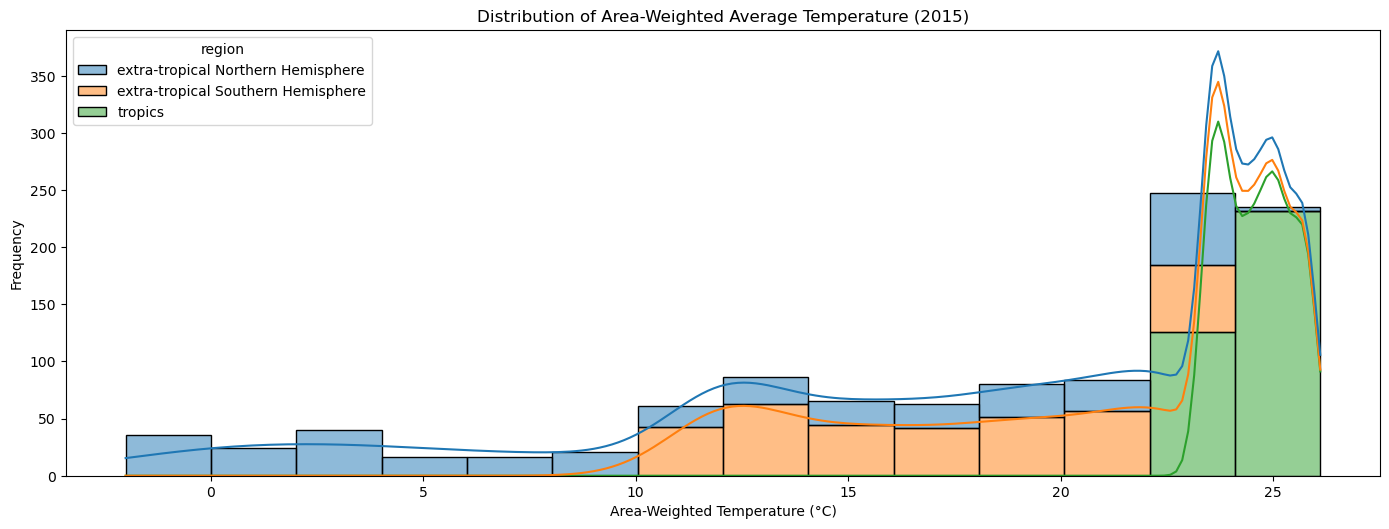

In [169]:
# Plot for area-weighted temperature
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
sns.histplot(data=results_df2, x="area_weighted_temp", hue="region", multiple="stack", kde=True)
plt.title("Distribution of Area-Weighted Average Temperature (2015)")
plt.xlabel("Area-Weighted Temperature (°C)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

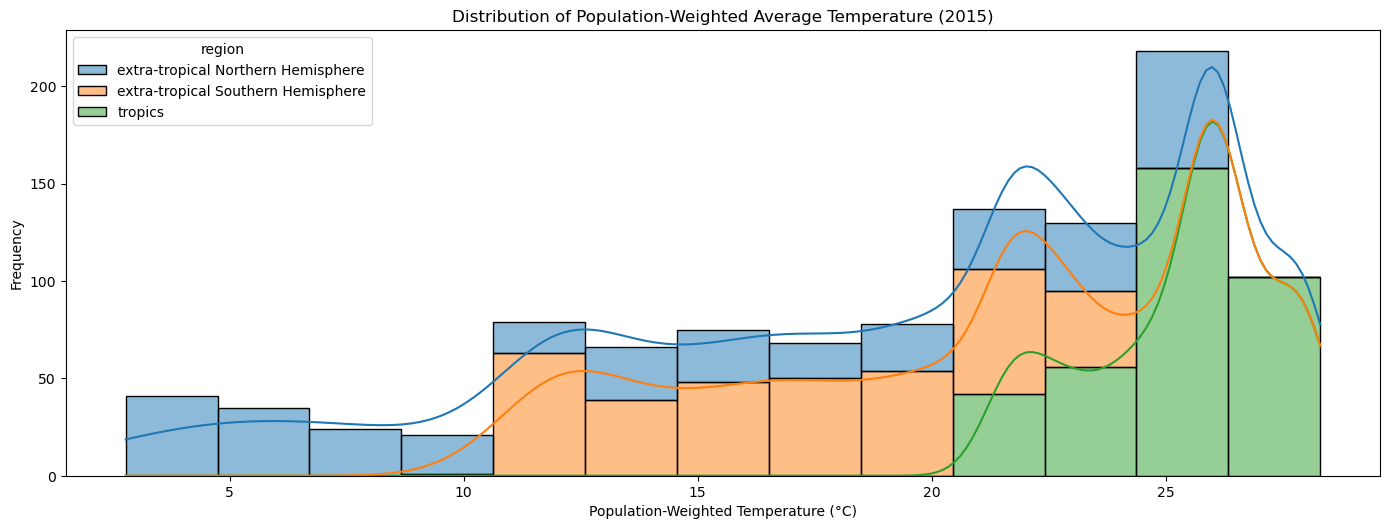

In [170]:
# Plot for population-weighted temperature
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 2)
sns.histplot(data=results_df2, x="population_weighted_temp", hue="region", multiple="stack", kde=True)
plt.title("Distribution of Population-Weighted Average Temperature (2015)")
plt.xlabel("Population-Weighted Temperature (°C)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Task 3: Visualization and Mapping

In [171]:
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go

## Map

In [178]:
# Calculate population-weighted average temperature for each country across all days in 2015
temperature_columns = [col for col in merged_df.columns if col.startswith('m') and '_d' in col]

# Calculate weighted sum of temperature for each country, then divide by total population to get the weighted average
merged_df['pop_weighted_temp'] = (
    merged_df[temperature_columns].multiply(merged_df['POP2005'], axis="index")
).sum(axis=1) / merged_df[temperature_columns].count(axis=1) / merged_df['POP2005']


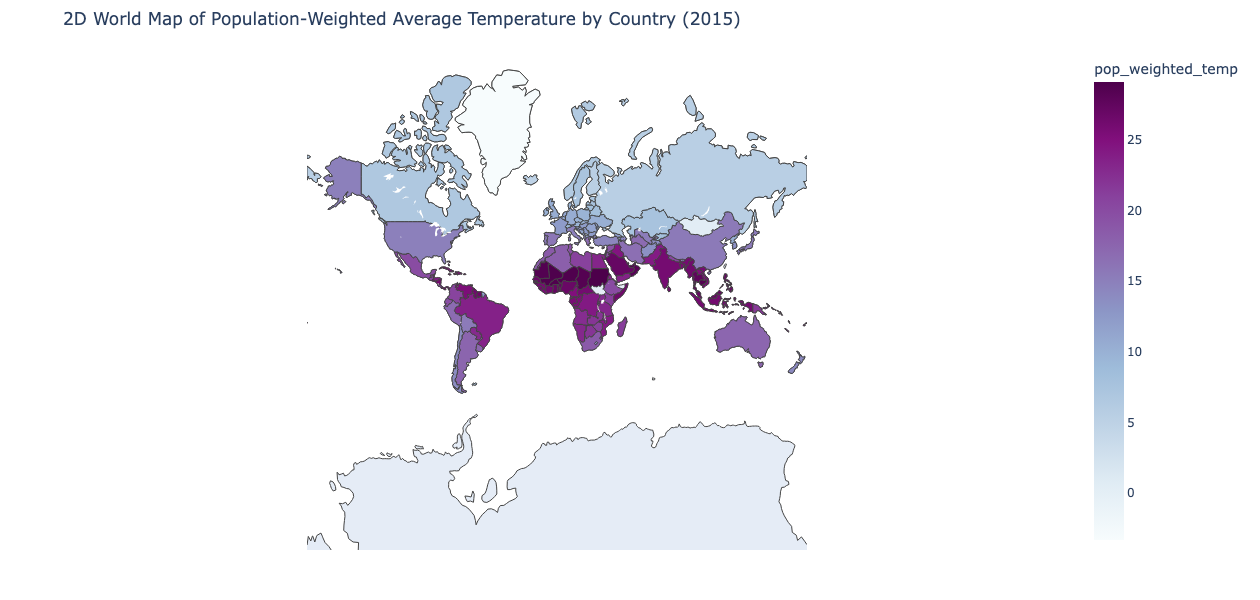

In [180]:
# Create a 2D choropleth map using the population-weighted average temperature for each country in 2015
fig = px.choropleth(
    merged_df,
    locations="iso3",  # ISO3 country codes
    color="pop_weighted_temp",  # Population-weighted average temperature
    hover_name="name",  # Country names
    color_continuous_scale=px.colors.sequential.BuPu,  # Color scale
    labels={'pop_weighted_temp_2015': 'Pop-Weighted Avg Temp (°C)'},  # Label for color bar
    title="2D World Map of Population-Weighted Average Temperature by Country (2015)",
    height=600
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='mercator'  # 2D flat projection
    ),
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()


## Boxplot

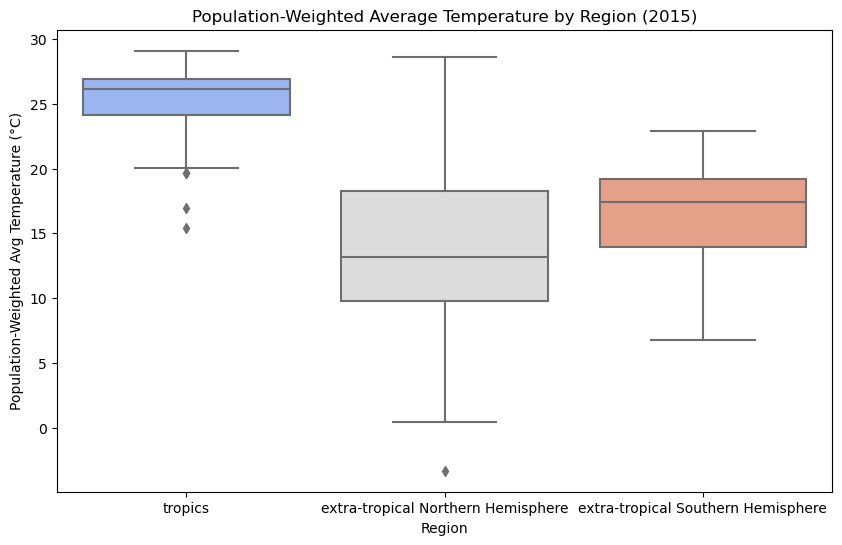

In [182]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='region', y='pop_weighted_temp', palette='coolwarm')

# Add labels and title
plt.xlabel("Region")
plt.ylabel("Population-Weighted Avg Temperature (°C)")
plt.title("Population-Weighted Average Temperature by Region (2015)")

plt.show()